# Introduction to Intel® Extension for Scikit-learn*


![Assets/dbscan.png](Assets/dbscan.png)

<a id='Back_to_Sections'></a>

## Sections
- [Introducing Intel® oneAPI AI Analytics Toolkit](#Intel-oneAPI-AI-Analytics-Toolkit)
- [Introduction to Intel® Distribution for Python*](#Introduction-to-Intel®-Distribution-for-Python*)
- [Intel® oneAPI Data Analytics Library](#Intel-oneAPI-Data-Analytics-Library)
- [Examine All Optimized Functions in Sklearnex](#Examine-All-Optimized-Functions-in-Sklearnex)
- [Demonstrate usage of Intel® Extension for Scikit-learn with kmeans using patch_sklearn](#Demonstrate-usage-of-Intel-Extension-for-Scikit-learn-with-kmeans-using-patch_sklearn)
- [Compare timings of stock kmeans versus Intel® Extension for Scikit-learn kmeans](#Compare-timings-of-stock-kmeans-versus-Intel-Extension-for-Scikit-learn-kmeans)
- [Introduction to Daal4py](#Introduction-to-Daal4py)
- [oneAPI and GPU support in Intel® Extension for Scikit learn*](oneAPI-and-GPU-support-in-Intel-Extension-for-Scikit-learn*)
- [Plot DBSCAN results as computed on GPU](#Plot-DBSCAN-results-as-computed-on-GPU)


## Learning Objectives

* Apply Intel Extension for Scikit-learn to KNeighborsClassifier example
* Apply daal4py to Kmeans clustering example
* Apply Intel Extension for Scikit-learn to set sycl_context to compute DBSCAN clustering using GPU or CPU



## Intel oneAPI AI Analytics Toolkit

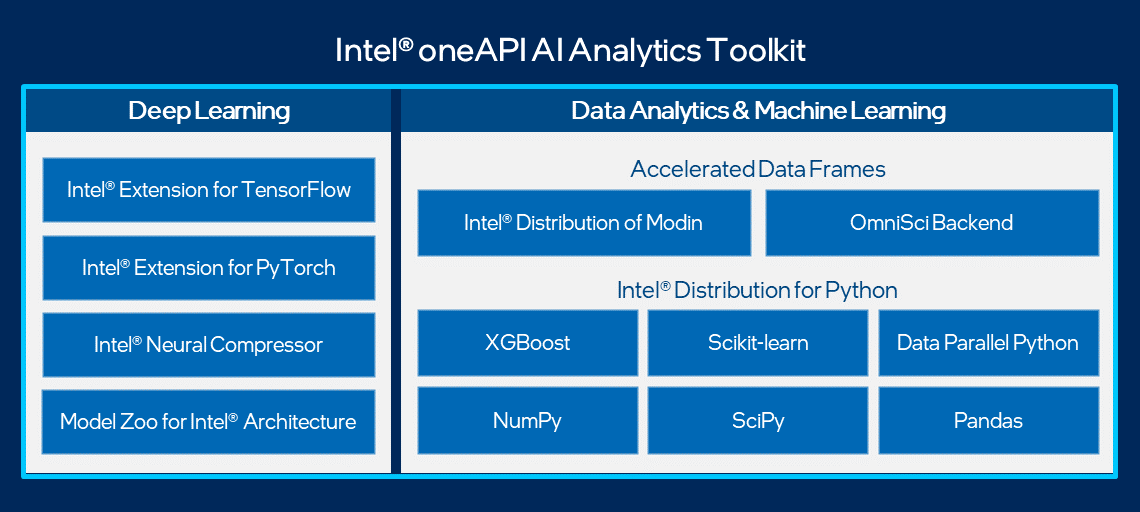

- [Back to Sections](#Back_to_Sections)

The Intel® oneAPI AI Analytics Toolkit gives data scientists, AI developers, and researchers familiar Python* tools and frameworks to accelerate end-to-end data science and analytics pipelines on Intel® architectures. The components are built using oneAPI libraries for low-level compute optimizations. This toolkit maximizes performance from preprocessing through machine learning, and provides interoperability for efficient model development.

The value: Using this toolkit, you can:

 - Deliver high-performance deep learning (DL) training on Intel® XPUs and integrate fast inference into your AI development workflow with Intel-optimized DL frameworks: TensorFlow* and PyTorch*, pretrained models, and low-precision tools. 
 - Achieve drop-in acceleration for data preprocessing and machine learning workflows with compute-intensive Python* packages: Modin*, scikit-learn*, and XGBoost* optimized for Intel.
 - Gain direct access to Intel analytics and AI optimizations to ensure that your software works together seamlessly.

### Data Analytics & Machine Learning Acceleration

* Increase machine learning model accuracy and performance with algorithms in scikit-learn and XGBoost, optimized for Intel® architectures.
* Scale out efficiently to clusters and perform distributed machine learning by using Intel® Extension for Scikit-learn*.


## Introduction to Intel® Distribution for Python*

Intel® Distribution for Python (IDP) is included as part of the Intel® oneAPI AI Analytics Toolkit

IDP is a complete Python distribution that includes the necessary Python packages to develop high-performing code targeting Intel® XPUs using Python. The distribution includes the following:

* Optimized Python numerical packages NumPy, Scikit-learn, MKL-FFT that use Intel® oneAPI Math Kernel Library (oneMKL) and Intel® oneAPI Data Analytics Library (oneDAL) to offer near-native performance.

* Customized version of the Numba* JIT compiler that allows generating fast code for Intel® XPUs.

* Data Parallel Python (DPPY) that is a set of packages enabling SYCL-based XPU programming.
    1. Data Parallel Control (dpctl): A package for controlling execution on SYCL devices and for SYCL USM data management.
    1. Data Parallel Numeric Python (dpnp): An implementation of the NumPy API using SYCL and oneMKL.
    1. Numba-dppy: A standalone extension to Numba adding SYCL kernel programming to Numba*.

* Faster machine learning with XGBoost*, scikit-learn, and advanced ML usages, including multiple devices, with daal4py.

* Scikit-ipp for image warping, image filtering, and morphological operations. Includes support for transform function multithreading and partial multithreading for filters using OpenMP.

- [Back to Sections](#Back_to_Sections)

The following code demonstrates usage of Intel(R) Extension for Scikit-learn. Inspect code; there are no modifications necessary:
1. Inspect the following code cell and click Run (▶)to save the code to file.
2. Next, run (▶) the cell in the __Build and Run__ section following the code to compile and execute the code.

# Examine All Optimized Functions in Sklearnex

These following are the currently optimized functions optimized with Intel(r) Extensions for scikit learn

- [Back to Sections](#Back_to_Sections)

In [1]:
from sklearnex import get_patch_names
get_patch_names()

['pca',
 'kmeans',
 'dbscan',
 'distances',
 'linear',
 'ridge',
 'elasticnet',
 'lasso',
 'logistic',
 'log_reg',
 'knn_classifier',
 'nearest_neighbors',
 'knn_regressor',
 'random_forest_classifier',
 'random_forest_regressor',
 'train_test_split',
 'fin_check',
 'roc_auc_score',
 'tsne',
 'logisticregression',
 'kneighborsclassifier',
 'nearestneighbors',
 'kneighborsregressor',
 'randomrorestclassifier',
 'randomforestregressor',
 'svr',
 'svc',
 'nusvr',
 'nusvc',
 'set_config',
 'get_config',
 'config_context']

# Demonstrate usage of Intel Extension for Scikit-learn with kmeans using patch_sklearn

- [Back to Sections](#Back_to_Sections)

In [2]:
%%writefile lab/scikit_kmeans.py

# Copyright 2021 Intel Corporation
#
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
#      http://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

import numpy as np
from sklearnex import patch_sklearn
patch_sklearn()

# You need to re-import scikit-learn algorithms after the patch
from sklearn.cluster import KMeans

X = np.array([[1,  2], [1,  4], [1,  0],
              [10, 2], [10, 4], [10, 0]])
kmeans = KMeans(n_clusters=2, random_state=0).fit(X)
print(f"kmeans.labels_ = {kmeans.labels_}")


Overwriting lab/scikit_kmeans.py


#### Build and Run
Select the cell below and click run ▶ to compile and execute the code:
- [Back to Sections](#Back_to_Sections)


In [3]:
! chmod 755 q; chmod 755 run_scikit_kmeans.sh; if [ -x "$(command -v qsub)" ]; then ./q run_scikit_kmeans.sh; else ./run_scikit_kmeans.sh; fi

chmod: cannot access 'run_scikit_kmeans.sh': No such file or directory
File run_scikit_kmeans.sh does not exist


## Compare timings of stock kmeans versus Intel Extension for Scikit-learn kmeans

Below we will apply Intel Extension for Scikit learn to a use case on a CPU

Intel® Extension for Scikit-learn (previously known as daal4py) contains drop-in replacement functionality for the stock scikit-learn package. You can take advantage of the performance optimizations of Intel Extension for Scikit-learn by adding just two lines of code before the usual scikit-learn imports. Intel® Extension for Scikit-learn patching affects performance of specific Scikit-learn functionality.

In the below example we will train and predict kNN algorithm with Intel Extension for Scikit-learn for MNIST dataset and calculate the CPU and wall clock time for training and prediction. Then in the next step we will unpatch the Intel extension for Scikit-learn and observe the time taken on the CPU for the same trainng and prediction.

- [Back to Sections](#Back_to_Sections)


The following code demonstrates usage of Intel(R) Extension for Scikit-learn. Inspect code; there are no modifications necessary:
1. Inspect the following code cell and click Run (▶)to save the code to file.
2. Next, run (▶) the cell in the __Build and Run__ section following the code to compile and execute the code.

In [4]:
from sklearnex import patch_sklearn
patch_sklearn()

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_openml
import timeit
import time

x, y = fetch_openml(name='mnist_784', return_X_y=True)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=72)
# Intel Extension for Scikit-learn (previously known as daal4py) contains drop-in replacement functionality for the stock scikit-learn package. You can take advantage of the performance optimizations of Intel Extension for Scikit-learn by adding just two lines of code before the usual scikit-learn imports:

#Intel(R) Extension for Scikit-learn patching affects performance of specific Scikit-learn functionality. Refer to the list of supported algorithms and parameters for details. In cases when unsupported parameters are used, the package fallbacks into original Scikit-learn. If the patching does not cover your scenarios, submit an issue on GitHub.

params = {
    'n_neighbors': 40,
    'weights': 'distance',
    'n_jobs': -1
}

#Training and predict KNN algorithm with Intel(R) Extension for Scikit-learn for MNIST dataset

def f_knn(x, y,xtest,ytest):
    from sklearn.neighbors import KNeighborsClassifier
    knn = KNeighborsClassifier(**params).fit(x, y)
    predicted = knn.predict(xtest)
    report = metrics.classification_report(y_test, predicted)
    print(f"Classification report for KNN:\n{report}\n")
    
def f_knn2(x, y,xtest,ytest):
    from sklearn.neighbors import KNeighborsClassifier
    start_time = time.time()
    knn = KNeighborsClassifier(**params).fit(x, y)
    predicted = knn.predict(xtest)
    end_time = time.time()
    print("Time to calculate knn.predict in parallel {:4.1f} seconds".format(end_time - start_time))
    return predicted
    
#report = metrics.classification_report(y_test, predicted)
#print(f"Classification report for KNN:\n{report}\n")
    
#t = timeit.Timer(lambda: f_knn(x_train,y_train,x_test,y_test))
#print("Time to calculate the sum in parallel {:4.1f} seconds".format(t.timeit(1)))
predicted = f_knn2(x_train,y_train,x_test,y_test)
report = metrics.classification_report(y_test, predicted)
print(f"Classification report for kNN:\n{report}\n")

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


Time to calculate knn.predict in parallel  4.6 seconds
Classification report for kNN:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1365
           1       0.93      0.99      0.96      1637
           2       0.99      0.94      0.96      1401
           3       0.96      0.95      0.96      1455
           4       0.98      0.96      0.97      1380
           5       0.95      0.95      0.95      1219
           6       0.96      0.99      0.97      1317
           7       0.94      0.95      0.95      1420
           8       0.99      0.90      0.94      1379
           9       0.92      0.94      0.93      1427

    accuracy                           0.96     14000
   macro avg       0.96      0.96      0.96     14000
weighted avg       0.96      0.96      0.96     14000




In order to cancel optimizations, we use unpatch_sklearn and reimport the class KNeighborsClassifier. Observe the time taken to train and predict without the optimizations. 

In [5]:
from sklearnex import unpatch_sklearn
unpatch_sklearn()

In [6]:
from sklearn.neighbors import KNeighborsClassifier
start_time = time.time()
knn = KNeighborsClassifier(**params).fit(x_train, y_train)
predicted = knn.predict(x_test)
end_time = time.time()
print("Time to calculate knn.predict in stock scikit-learn {:4.1f} seconds".format(end_time - start_time))
report = metrics.classification_report(y_test, predicted)
print(f"Classification report for kNN:\n{report}\n")

Time to calculate knn.predict in stock scikit-learn 21.8 seconds
Classification report for kNN:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1365
           1       0.93      0.99      0.96      1637
           2       0.99      0.94      0.96      1401
           3       0.96      0.95      0.96      1455
           4       0.98      0.96      0.97      1380
           5       0.95      0.95      0.95      1219
           6       0.96      0.99      0.97      1317
           7       0.94      0.95      0.95      1420
           8       0.99      0.90      0.94      1379
           9       0.92      0.94      0.93      1427

    accuracy                           0.96     14000
   macro avg       0.96      0.96      0.96     14000
weighted avg       0.96      0.96      0.96     14000




We observe that with scikit-learn-intelex patching you can:

Use your scikit-learn code for training and prediction with minimal changes (a couple of lines of code);
Fast execution training and prediction of scikit-learn models;
Get the same quality.

## oneAPI and GPU support in Intel Extension for Scikit learn*
DPCTL is the python mechanism used to interface to SYCL device management. It is implemented via with sycl_context("xpu") blocks that redirect execution to a device of the selected type: GPU, CPU, or host. scikit-learn programs can be executed on GPU devices as well.

- [Back to Sections](#Back_to_Sections)

To patch your code with Intel CPU/GPU optimizations:

The following code demonstrates usage of simple DPPY code. Inspect code; there are no modifications necessary:
1. Inspect the following code cell and click Run (▶)to save the code to file.
2. Next, run (▶) the cell in the __Build and Run__ section following the code to compile and execute the code.

# Current implementation of dpctl

scikit-learn methods which return type: "Returns the instance itself.",are currently implicitly copied back to host

numpy arrays **from host** to GPU must be cast using:
- dpctl.tensor.from_numpy()

numpy arrays from GPU **to host** must be cast using:
- dpctl.tensor.to_numpy()

This implementation may change in the future to accomdate other types: perhaps returning classes, etc. For example, in the future, return type which "Returns the instance itself.", may have an API to explicitly cast/copy back to the host

In [7]:

from sklearn.cluster import DBSCAN
?DBSCAN.fit

Signature: DBSCAN.fit(self, X, y=None, sample_weight=None)
Docstring:
Perform DBSCAN clustering from features, or distance matrix.

Parameters
----------
X : {array-like, sparse matrix} of shape (n_samples, n_features), or             (n_samples, n_samples)
    Training instances to cluster, or distances between instances if
    ``metric='precomputed'``. If a sparse matrix is provided, it will
    be converted into a sparse ``csr_matrix``.

y : Ignored
    Not used, present here for API consistency by convention.

sample_weight : array-like of shape (n_samples,), default=None
    Weight of each sample, such that a sample with a weight of at least
    ``min_samples`` is by itself a core sample; a sample with a
    negative weight may inhibit its eps-neighbor from being core.
    Note that weights are absolute, and default to 1.

Returns
-------
self : object
    Returns a fitted instance of self.
File:      ~/.local/lib/python3.9/site-packages/sklearn/cluster/_dbscan.py
Type:      funct

In [29]:
%%writefile lab/scikit_dbscan.py

# Copyright 2021 Intel Corporation
#
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
#      http://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

from sklearnex import patch_sklearn
patch_sklearn()

import pandas as pd
import numpy as np

from sklearn.cluster import DBSCAN
import dpctl

X = np.array([[1., 2.], [2., 2.], [2., 3.],
            [8., 7.], [8., 8.], [25., 80.]], dtype=np.float32)

for d in dpctl.get_devices():
    gpu_available = False
    for d in dpctl.get_devices():
        if d.is_gpu:
            gpu_device = dpctl.select_gpu_device()
            gpu_available = True
        else:
            cpu_device = dpctl.select_cpu_device() 
if gpu_available:
    print("GPU targeted: ", gpu_device)
else:
    print("CPU targeted: ", cpu_device)

if gpu_available:
    # target a remote hosy CPU when submitted via q.sh or qsub -I
    x_device = dpctl.tensor.from_numpy(X, usm_type = 'device', queue=dpctl.SyclQueue(gpu_device))
else:
    # target a remote hosy CPU when submitted via q.sh or qsub -I
    x_device = dpctl.tensor.from_numpy(X, usm_type = 'device', queue=dpctl.SyclQueue(cpu_device))

clustering_host = DBSCAN(eps=3, min_samples=2).fit(x_device)

print("DBSCAN.get_params: ",DBSCAN.get_params)
print('data type clustering_host.labels_', type(clustering_host.labels_))
# write results to parquet for later plotting when using qsub 

clustering_labels = pd.DataFrame(clustering_host.labels_)
clustering_labels.to_csv('DBSCAN_Labels.csv', index=False )

clustering_components = pd.DataFrame(clustering_host.components_)
clustering_components.to_csv('DBSCAN_Components.csv', index=False )

print("DBSCAN components: ", clustering_host.components_, "\nDBSCAN labels: ",clustering_host.labels_)

Overwriting lab/scikit_dbscan.py


#### Build and Run
Select the cell below and click run ▶ to compile and execute the code:

In [33]:
! chmod 755 q; chmod 755 run_scikit_dbscan.sh; if [ -x "$(command -v qsub)" ]; then ./q run_scikit_dbscan.sh; else ./run_scikit_dbscan.sh; fi

Job has been submitted to Intel(R) DevCloud and will execute soon.

 If you do not see result in 60 seconds, please restart the Jupyter kernel:
 Kernel -> 'Restart Kernel and Clear All Outputs...' and then try again

Job ID                    Name             User            Time Use S Queue
------------------------- ---------------- --------------- -------- - -----
1879748.v-qsvr-1           ...ub-singleuser u78349          00:36:02 R jupyterhub     
1879861.v-qsvr-1           STDIN            u78349          00:00:13 R batch          
1879867.v-qsvr-1           ...kit_dbscan.sh u78349                 0 Q batch          

Waiting for Output ██████████████████████████████████████████████████ Done⬇

########################################################################
#      Date:           Mon 11 Apr 2022 11:16:10 AM PDT
#    Job ID:           1879867.v-qsvr-1.aidevcloud
#      User:           u78349
# Resources:           neednodes=1:gpu:ppn=2,nodes=1:gpu:ppn=2,walltime=06:00:00
##

In [22]:
clustering_host.components_

array([[1., 2.],
       [2., 2.],
       [2., 3.],
       [8., 7.],
       [8., 8.]], dtype=float32)

_If the Jupyter cells are not responsive, or if they error out when you compile the code samples, please restart the Jupyter Kernel: 
"Kernel->Restart Kernel and Clear All Outputs" and compile the code samples again_.

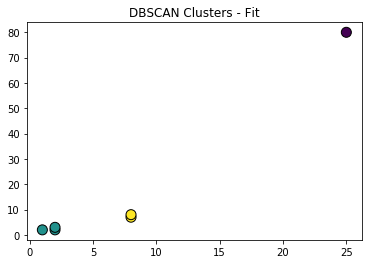

In [34]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

labels = pd.read_csv('DBSCAN_Components.csv')
labels = pd.read_csv('DBSCAN_Labels.csv')

plt.title('DBSCAN Clusters - Fit')
plt.scatter(X[:, 0], X[:, 1], s=100, c=labels.iloc[:,0].tolist(), edgecolor="k")
plt.show()

The following code demonstrates DBSCAN algorithm and runs on CPU GPU and host. Inspect code; there are no modifications necessary:
1. Inspect the following code cell and click Run (▶)to save the code to file.
2. Next, run (▶) the cell in the __Build and Run__ section following the code to compile and execute the code.

In [35]:
%%writefile lab/sklearn_sycl.py

#===============================================================================
# Copyright 2014-2021 Intel Corporation
#
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
#     http://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.
#===============================================================================

# daal4py Scikit-Learn examples for GPU
# run like this:
#    python -m sklearnex ./sklearn_sycl.py

import numpy as np
from sklearnex import patch_sklearn
patch_sklearn()

from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import DBSCAN

from sklearn.datasets import load_iris
import dpctl

def k_means_random(gpu_device):
    print("KMeans init='random'")
    X = np.array([[1., 2.], [1., 4.], [1., 0.],
                  [10., 2.], [10., 4.], [10., 0.]], dtype=np.float32)
    
    x_device = dpctl.tensor.from_numpy(X, usm_type = 'device', queue=dpctl.SyclQueue(gpu_device))
    kmeans = KMeans(n_clusters=2, random_state=0, init='random').fit(x_device)
    #kmeans = KMeans(n_clusters=2).fit(x_device)

    print("kmeans.labels_")
    print(kmeans.labels_)
    print("kmeans.predict([[0, 0], [12, 3]])")
    print(kmeans.predict(np.array([[0, 0], [12, 3]], dtype=np.float32)))
    print("kmeans.cluster_centers_")
    print(kmeans.cluster_centers_)


def linear_regression(gpu_device):
    print("LinearRegression")
    X = np.array([[1., 1.], [1., 2.], [2., 2.], [2., 3.]], dtype=np.float32)
    # y = 1 * x_0 + 2 * x_1 + 3
    y = np.dot(X, np.array([1, 2], dtype=np.float32)) + 3
           
    x_device = dpctl.tensor.from_numpy(X, usm_type = 'device', queue=dpctl.SyclQueue(gpu_device))
    y_device = dpctl.tensor.from_numpy(y, usm_type = 'device', queue=dpctl.SyclQueue(gpu_device))

    reg = LinearRegression().fit(x_device, y_device)
    print("reg.score(X, y)")
    print(reg.score(X, y))
    print("reg.coef_")
    print(reg.coef_)
    print("reg.intercept_")
    print(reg.intercept_)
    print("reg.predict(np.array([[3, 5]], dtype=np.float32))")
    print(reg.predict(np.array([[3, 5]], dtype=np.float32)))


def logistic_regression_lbfgs(gpu_device):
    print("LogisticRegression solver='lbfgs'")
    X, y = load_iris(return_X_y=True)
          
    x_device = dpctl.tensor.from_numpy(X, usm_type = 'device', queue=dpctl.SyclQueue(gpu_device))
    y_device = dpctl.tensor.from_numpy(y, usm_type = 'device', queue=dpctl.SyclQueue(gpu_device))

    clf = LogisticRegression(random_state=0, solver='lbfgs').fit(
        x_device,
        y_device)
    print("clf.predict(X[:2, :])")
    print(clf.predict(X[:2, :]))
    print("clf.predict_proba(X[:2, :])")
    print(clf.predict_proba(X[:2, :]))
    print("clf.score(X, y)")
    print(clf.score(X, y))


def logistic_regression_newton(gpu_device):
    print("LogisticRegression solver='newton-cg'")
    X, y = load_iris(return_X_y=True)
            
    x_device = dpctl.tensor.from_numpy(X, usm_type = 'device', queue=dpctl.SyclQueue(gpu_device))
    y_device = dpctl.tensor.from_numpy(y, usm_type = 'device', queue=dpctl.SyclQueue(gpu_device))

    clf = LogisticRegression(random_state=0, solver='newton-cg').fit(
        x_device,
        y_device)
    print("clf.predict(X[:2, :])")
    print(clf.predict(X[:2, :]))
    print("clf.predict_proba(X[:2, :])")
    print(clf.predict_proba(X[:2, :]))
    print("clf.score(X, y)")
    print(clf.score(X, y))


def dbscan(gpu_device):
    print("DBSCAN")
    X = np.array([[1., 2.], [2., 2.], [2., 3.],
                  [8., 7.], [8., 8.], [25., 80.]], dtype=np.float32)
    
    x_device = dpctl.tensor.from_numpy(X, usm_type = 'device', queue=dpctl.SyclQueue(gpu_device))    
    clustering = DBSCAN(eps=3, min_samples=2).fit(x_device)
    print("clustering.labels_")
    print(clustering.labels_)
    print("clustering")
    print(clustering)

if __name__ == "__main__":
    examples = [
        k_means_random,
        linear_regression,
        logistic_regression_lbfgs,
        #logistic_regression_newton,
        dbscan,
    ]

    for d in dpctl.get_devices():
        gpu_available = False
        for d in dpctl.get_devices():
            if d.is_gpu:
                gpu_device = dpctl.select_gpu_device()
                gpu_available = True
            else:
                cpu_device = dpctl.select_cpu_device() 
    if gpu_available:
        print("GPU targeted: ", gpu_device)
    else:
        print("CPU targeted: ", cpu_device)
        
    device = gpu_device
    for e in examples:
        print("*" * 80)
        try:
            e(device)
        except:
            print(e, " Failed")
        print("*" * 80)

    print('All looks good!')


Writing lab/sklearn_sycl.py


#### Build and Run
Select the cell below and click run ▶ to compile and execute the code:

In [36]:
! chmod 755 q; chmod 755 run_sklearn_sycl.sh; if [ -x "$(command -v qsub)" ]; then ./q run_sklearn_sycl.sh; else ./run_sklearn_sycl.sh; fi

Job has been submitted to Intel(R) DevCloud and will execute soon.

 If you do not see result in 60 seconds, please restart the Jupyter kernel:
 Kernel -> 'Restart Kernel and Clear All Outputs...' and then try again

Job ID                    Name             User            Time Use S Queue
------------------------- ---------------- --------------- -------- - -----
1879748.v-qsvr-1           ...ub-singleuser u78349          00:36:02 R jupyterhub     
1879861.v-qsvr-1           STDIN            u78349          00:00:13 R batch          
1879868.v-qsvr-1           ...learn_sycl.sh u78349                 0 Q batch          

Waiting for Output █████████████████████████████████████████ Done⬇

########################################################################
#      Date:           Mon 11 Apr 2022 11:17:41 AM PDT
#    Job ID:           1879868.v-qsvr-1.aidevcloud
#      User:           u78349
# Resources:           neednodes=1:gpu:ppn=2,nodes=1:gpu:ppn=2,walltime=06:00:00
###########

# Summary
In this module you will have learned the following:
* How the __oneAPI__ programming model can solve the challenges of programming in a heterogeneous world
* Details of Intel Distribution of Python
*  __Data Parallel Python (DPPY)__ and the basics of Dppy
* How to use __Numba__ and __Numba-DPPY__ to offload to a CPU and GPU

# Notices & Disclaimers 

Intel technologies may require enabled hardware, software or service activation.
No product or component can be absolutely secure.

Your costs and results may vary.

© Intel Corporation. Intel, the Intel logo, and other Intel marks are trademarks of Intel Corporation or its subsidiaries. 
*Other names and brands may be claimed as the property of others.

